<a href="https://colab.research.google.com/github/tan1106/ML_Projects/blob/main/Image_classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train = y_train.reshape(-1,)

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

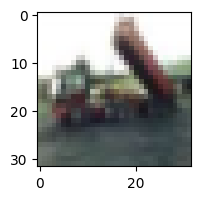

In [8]:
plt.figure(figsize=(5,2))
plt.imshow(X_train[2])

In [9]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [11]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#sparse categorical crossentropy is used when we have more than 0 n 1 to be categorised like here it is from 0-9

cnn.fit(X_train, y_train, validation_data=(X_train,y_train),epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.4803 - accuracy: 0.4670 - val_loss: 1.2682 - val_accuracy: 0.5536
Epoch 2/10
1563/1563 [==============================] - 80s 51ms/step - loss: 1.1430 - accuracy: 0.5995 - val_loss: 1.0098 - val_accuracy: 0.6487
Epoch 3/10
1563/1563 [==============================] - 77s 50ms/step - loss: 1.0209 - accuracy: 0.6430 - val_loss: 0.9834 - val_accuracy: 0.6551
Epoch 4/10
1563/1563 [==============================] - 76s 49ms/step - loss: 0.9393 - accuracy: 0.6731 - val_loss: 0.8668 - val_accuracy: 0.6988
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8854 - accuracy: 0.6939 - val_loss: 0.8289 - val_accuracy: 0.7148
Epoch 6/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.8296 - accuracy: 0.7129 - val_loss: 0.8019 - val_accuracy: 0.7192
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7894 - accuracy: 0.7263 - val_loss: 0.6968 -

In [12]:
cnn.evaluate(X_train,y_train)

1563/1563 [==============================] - 17s 11ms/step - loss: 0.5912 - accuracy: 0.7955


[0.5911836624145508, 0.7954800128936768]

In [13]:
y_pred = cnn.predict(X_test)

313/313 [==============================] - 3s 10ms/step


In [14]:
y_classes = [np.argmax(element) for element in y_pred]

In [22]:
y_test=y_test.reshape(-1,)
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

In [17]:
y_classes[:10]

[3, 8, 1, 0, 6, 6, 1, 6, 3, 1]

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

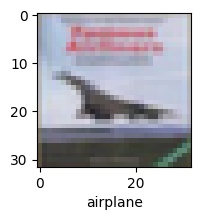

In [24]:
plot_sample(X_test,y_test,3)

In [25]:
classes[y_classes[3]]

'airplane'